## Notebook to evaluate a file from EJ compliance

Checks the output of the compliance module by seeing the distribution of compliance ratings. 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
file_path = "/Users/user/compliance_edward_jones.csv"

In [2]:
with open(file_path) as f:
    df = pd.read_csv(f)

In [3]:
df

,cusip,quantity,trade_type,ytw,price,yield_to_worst_date,user_price,bid_ask_price_delta,compliance_rating,trade_datetime,SIDE,GRP_ORD_NO,FI_TRD_TRAN_ID,FILL_ID,PMP_ID,SIDE.1,CLNT_TY_DESC,TRD_CAP_CD
0,249721GW5,85000,Offered Side,4.132,88.467,07-15-2033,87.371,0.231,Great,2025-02-06 17:07:54 ET,Buy,31935278,14758626,465807927,NaN,Buy,Client,PR
1,249721GW5,85000,Inter-Dealer,4.268,87.582,07-15-2033,87.371,0.762,Great,2025-02-06 17:07:40 ET,Buy,31940006,14750229,465807926,NaN,Buy,Dealer,PR
2,882854Z70,20000,Offered Side,4.086,98.667,10-15-2049,96.700,1.424,Great,2025-02-06 16:58:54 ET,Buy,31933205,14750766,465807808,NaN,Buy,Client,PR
3,63968XBJ3,20000,Offered Side,-1,-1.000,One or more of the following fields necessary ...,NaN,NaN,NaN,NaN,Buy,31938009,14754338,465807788,NaN,Buy,Client,PI
4,882854Z70,20000,Inter-Dealer,4.222,96.605,10-15-2049,96.700,1.608,Good,2025-02-06 16:57:42 ET,Buy,31938217,14750227,465807807,NaN,Buy,Dealer,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74320,914745DS0,5000,Offered Side,3.958,100.069,10-01-2026,98.692,1.206,Great,2024-12-02 08:02:39 ET,Buy,969932460,12940763,403612248,NaN,Buy,Client,PI
74321,452259EX8,20000,Offered Side,4.014,99.801,04-01-2045,97.626,0.503,Great,2024-12-02 08:02:26 ET,Buy,969933089,12943241,403612217,221009.0,Buy,Client,PI
74322,523494RK0,20000,Offered Side,3.955,100.320,08-01-2033,98.250,0.146,Great,2024-12-02 08:02:23 ET,Buy,969932347,12930889,403612215,NaN,Buy,Client,PI
74323,452259EX8,20000,Offered Side,4.017,99.760,04-01-2045,97.626,0.725,Great,2024-12-02 08:02:22 ET,Buy,969932741,12943240,403612214,221009.0,Buy,Client,PI


In [10]:
df.compliance_rating.value_counts()

Great    55586
Good     12032
Fair      1110
Poor       862
Name: compliance_rating, dtype: int64

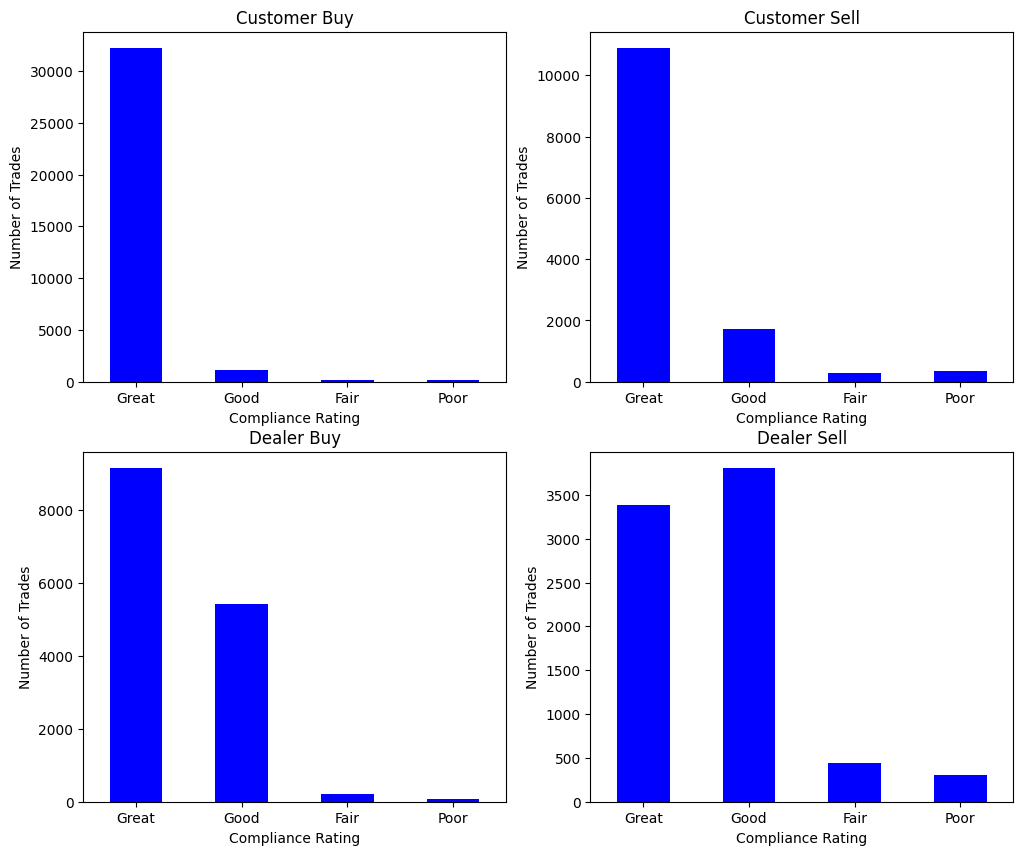

In [12]:
df = df.dropna(subset=["compliance_rating"])

categories = ["Great", "Good", "Fair","Poor"]

subsets = {
    "Customer Buy": df[(df["SIDE"] == "Buy") & (df["CLNT_TY_DESC"] == "Client")],
    "Customer Sell": df[(df["SIDE"] == "Sell") & (df["CLNT_TY_DESC"] == "Client")],
    "Dealer Buy": df[(df["SIDE"] == "Buy") & (df["CLNT_TY_DESC"] == "Dealer")],
    "Dealer Sell": df[(df["SIDE"] == "Sell") & (df["CLNT_TY_DESC"] == "Dealer")]
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, (title, subset) in zip(axes.flatten(), subsets.items()):
    counts = subset["compliance_rating"].value_counts().reindex(categories, fill_value=0)
    counts.plot(kind="bar", ax=ax, color=[ "blue"])
    ax.set_title(title)
    ax.set_xlabel("Compliance Rating")
    ax.set_ylabel("Number of Trades")
    ax.set_xticklabels(categories, rotation=0)
